# **07 Regression dengan KNN (K Nearest Neighbours)**
- Klasifikasi KNN adalah model pembelajaran mesin yang memprediksi label suatu data berdasarkan kedekatannya dengan sejumlah tetangga terdekat
- Metode prediksi ini dapat diterapkan baik untuk tugas klasifikasi maupun regresi <br>

Referensi : <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">Wikipedia</a>

**Sample Dataset**

In [2]:
import pandas as pd

sensus = {'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 170], 
          'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'],
          'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67]}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,jk,berat
0,158,pria,64
1,170,pria,86
2,183,pria,84
3,191,pria,80
4,155,wanita,49
5,163,wanita,59
6,180,wanita,67
7,158,wanita,54
8,170,wanita,67


**Regression dengan KNN**

Features & Target

In [6]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'jk']])
y_train = np.array(sensus_df['berat'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [170 'wanita']]

y_train: [64 86 84 80 49 59 67 54 67]


**Preprocess Dataset : Konversi Label menjadi numerik biner** 
- Fungsi np.transpose() digunakan untuk melakukan perubahan orientasi dari baris menjadi kolom atau sebaliknya
- Fungsi fit_transform() digunakan untuk mengubah nilai-nilai string menjadi representasi biner menggunakan teknik tertentu
- Fungsi flatten() digunakan untuk mengubah array 2 dimensi menjadi array 1 dimensi
- Fungsi transpose() digunakan untuk melakukan perubahan orientasi dari kolom menjadi baris atau sebaliknya

In [9]:
X_train_transposed = np.transpose(X_train)

print(f'X_train:\n{X_train}\n')
print(f'X_train_transposed:\n{X_train_transposed}')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [170 'wanita']]

X_train_transposed:
[[158 170 183 191 155 163 180 158 170]
 ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita'
  'wanita']]


In [11]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
jk_binarised = lb.fit_transform(X_train_transposed[1])

print(f'jk: {X_train_transposed[1]}\n')
print(f'jk_binarised:\n{jk_binarised}')

jk: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']

jk_binarised:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [12]:
jk_binarised = jk_binarised.flatten()
jk_binarised

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [13]:
X_train_transposed[1] = jk_binarised
X_train = X_train_transposed.transpose()

print(f'X_train_transposed:\n{X_train_transposed}\n')
print(f'X_train:\n{X_train}')

X_train_transposed:
[[158 170 183 191 155 163 180 158 170]
 [0 0 0 0 1 1 1 1 1]]

X_train:
[[158 0]
 [170 0]
 [183 0]
 [191 0]
 [155 1]
 [163 1]
 [180 1]
 [158 1]
 [170 1]]


**Training KNN Regression Model**

In [18]:
from sklearn.neighbors import KNeighborsRegressor

K = 3
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

**Prediksi Berat Badan**

In [21]:
X_new = np.array([[155, 1]])
X_new

array([[155,   1]])

In [23]:
y_pred = model.predict(X_new)
y_pred

array([55.66666667])

**Evaluasi KNN Regression Model**

In [26]:
X_test = np.array([[168, 0], [180, 0], [160, 1], [169, 1]])
y_test = np.array([65, 96, 52, 67])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[168   0]
 [180   0]
 [160   1]
 [169   1]]

y_test: [65 96 52 67]


In [28]:
y_pred = model.predict(X_test)
y_pred

array([70.66666667, 79.        , 59.        , 70.66666667])

**Coefficient of Determination atau ** <br>
Referensi : <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">Wikipedia</a><br>
- Jika nilai  semakin mendekati 1, itu menunjukkan bahwa model yang dihasilkan semakin baik, Begitu juga sebaliknya. Hal ini dapat di evaluasi menggunakan fungsi r2_score()

In [31]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6290565226735438


**Mean Absolute Error (MAE) atau Mean Absolute Deviation (MAD)**

 is the average of the absolute values of the errors of the predictions. <br>

 <br>
Referensi : https://en.wikipedia.org/wiki/Mean_absolute_error

In [46]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {MAE}')

MAE: 8.333333333333336


**Mean Squared Error (MSE) atau Mean Squared Deviation (MSD)**

 is the average of the squares of the errors of the predictions

 <br>
Referensi : https://en.wikipedia.org/wiki/Mean_squared_error
- Seperti yang terjadi pada MAE, semakin rendah nilai MSE, semakin baik performa model dalam melakukan prediksi. Demikian juga, sebaliknya

In [59]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)

print(f'MSE: {MSE}')

MSE: 95.8888888888889


**Permasalahan Scaling pada Features**

In [62]:
from scipy.spatial.distance import euclidean

# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_new = np.array([[1640, 0]])

[euclidean(X_new[0], d) for d in X_train]

[60.0, 40.01249804748511]

In [64]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_new = np.array([[1.64, 0]])

[euclidean(X_new[0], d) for d in X_train]

[0.06000000000000005, 1.0007996802557442]

**Menerapkan Standard Scaler (Standard Score atau Z-Score)**

Standardize features by removing the mean and scaling to unit variance

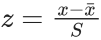 <br>
Referensi : https://en.wikipedia.org/wiki/Standard_score

In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [71]:
# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_train_scaled = ss.fit_transform(X_train)
print(f'X_train_scaled:\n{X_train_scaled}\n')

X_new = np.array([[1640, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled: {X_new_scaled}\n')

jarak = [euclidean(X_new_scaled[0], d) for d in X_train_scaled]
print(f'jarak: {jarak}')

X_train_scaled:
[[ 1. -1.]
 [-1.  1.]]

X_new_scaled: [[-0.2 -1. ]]

jarak: [1.2, 2.1540659228538015]


In [73]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_train_scaled = ss.fit_transform(X_train)
print(f'X_train_scaled:\n{X_train_scaled}\n')

X_new = np.array([[1.64, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled: {X_new_scaled}\n')

jarak = [euclidean(X_new_scaled[0], d) for d in X_train_scaled]
print(f'jarak: {jarak}')

X_train_scaled:
[[ 1. -1.]
 [-1.  1.]]

X_new_scaled: [[-0.2 -1. ]]

jarak: [1.2000000000000026, 2.1540659228538006]


**Menerapkan Features Scalling pada KNN**

Dataset

In [77]:
# Training Set
X_train = np.array([[158, 0], [170, 0], [183, 0], [191, 0], [155, 1], [163, 1],
                    [180, 1], [158, 1], [170, 1]])

y_train = np.array([64, 86, 84, 80, 49, 59, 67, 54, 67])

# Test Set
X_test = np.array([[168, 0], [180, 0], [160, 1], [169, 1]])
y_test = np.array([65, 96, 52, 67])

Feature Scalling (Standard Scaler)

In [80]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

print(f'X_train_scaled:\n{X_train_scaled}\n')
print(f'X_test_scaled:\n{X_test_scaled}\n')

X_train_scaled:
[[-0.9908706  -1.11803399]
 [ 0.01869567 -1.11803399]
 [ 1.11239246 -1.11803399]
 [ 1.78543664 -1.11803399]
 [-1.24326216  0.89442719]
 [-0.57021798  0.89442719]
 [ 0.86000089  0.89442719]
 [-0.9908706   0.89442719]
 [ 0.01869567  0.89442719]]

X_test_scaled:
[[-0.14956537 -1.11803399]
 [ 0.86000089 -1.11803399]
 [-0.82260955  0.89442719]
 [-0.06543485  0.89442719]]



Training & Evaluasi Model

In [85]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')

MAE: 7.583333333333336
MSE: 85.13888888888893
